In [1]:
# 보내드린 파일의 압축을 해제하시면 2개의 폴더 "test1"와 "OpenLabeling-master"가 나옵니다.
# 이 두 폴더를 다 로컬 디스크 (C:)로 옮기시고 진행하시면 됩니다.

In [1]:
pwd #현재경로확인

'C:\\KP'

# [단계 ①] 라이브러리/데이터 불러오기

In [2]:
# 별도 코드 없음
# □ CUDA 설치

In [4]:
# □ opencv-python 설치
!pip install opencv-python

In [5]:
# □ pytorch 설치 (둘중 하나로 진행)
!conda install pytorch torchvision torchaudio cudatoolkit=10.2 –c pytorch

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - ?c
  - torchaudio
  - torchvision

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [6]:
# 위로 안되면 아래 방법으로
!pip install torch===1.7.0 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [7]:
# □ pillow 설치
!pip install pillow

# [단계 ②] 데이터 종류 및 개수 확인

In [3]:
from PIL import Image
import matplotlib.pylab as plt

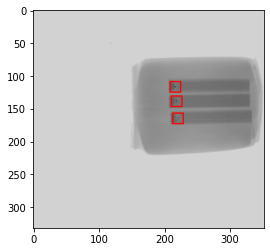

In [4]:
# 원본 데이터 이미지 확인
i = Image.open('C:/test1/yolov3/X선이물검출기(06.23_09.22)/1호기(2020.09.22)/SN77128_20200622_NgImage/002_20200622_203053(2).bmp')

plt.imshow(i)
plt.show()

In [5]:
# Anaconda Prompt 실행
# "cd .."을 반복 하여 "(base) C:\>" 이 상태로 디렉토리 초기화 이후
# "jupyter notebook" 입력(같은 경로인 로컬 디스크 (C:)에 보내드린 파일들이 있도록 옮겨놓으셔야 합니다.)
# 이 과정을 마치면 분석에 쓰이는 모든 데이터, 파일, 파이썬 코드들이 있는 디렉토리로 설정되는 것입니다.

# 이미지 재정리 (코드로 직접 입력)

In [7]:
# 디렉토리 경로 설정
%cd C:/test1/yolov3/images
!ren *.* *.jpg*

C:\test1\yolov3\images


In [9]:
# Raw Image에서 재정리합니다
import os 
import shutil

image_dir = "C:/test1/yolov3/X선이물검출기(06.23_09.22)" # img_dir 저장된 위치에 맞게 변환
file= os.listdir(image_dir)

os.mkdir("C:/test1/yolov3/X선이물검출기")

for i in range(len(file)):
  os.mkdir("C:/test1/yolov3/X선이물검출기" + "/"+ str(i+1) + "호기") # 저장할 주소에 맞게 변환

for a in file:
  path = image_dir +"/"+ a
  file2 = os.listdir(path) 
  for b in file2:
    if(b[17:]=="NgImage"):
      path2 = path+"/"+b
      file3 = os.listdir(path2)
      for c in file3:
        shutil.copy(path2+"/"+c, "C:/test1/yolov3/X선이물검출기"+"/"+a[0]+"호기")

In [13]:
# 위 작업을 거치면 yolov3폴더에 "X선이물검출기"라는 폴더가 생기며 원본 데이터들이 호기별로 정리돼 있습니다.

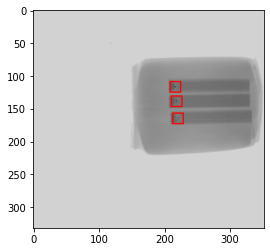

In [10]:
im = Image.open('C:/test1/yolov3/X선이물검출기/1호기/002_20200622_203053(2).bmp')

plt.imshow(im)
plt.show()

# [단계 ③] 데이터 정제(전처리) (코드로 직접 입력)

In [11]:
# labeling tool을 실행합니다.
# (로컬디스크 C에 Labeling tool폴더를 옮겨놓으셔야 합니다.)
# "C:/OpenLabeling-master\main\input"경로에 라벨링할 이미지들을 옮겨 놓습니다.
!python C:/OpenLabeling-master/main/main.py

-> Please ignore this error message

Showing image 0/14, path: input\001_20200622_203312(6).bmp
Welcome!
 Press [h] for help.


In [16]:
# prompt 에서 "python C:/OpenLabeling-master/main/main.py"
# 를 그대로 입력하여도 실행됩니다.

### ■ Labeling tool 컨트롤 키 

##### D: 다음 그림으로 이동한다
##### A: 이전 그림으로 이동한다
##### S: 다른 클래스로 변경한다 (다른 클래스로 라벨링)
##### Q: 프로그램을 종료한다
##### (마우스 우클릭): 라벨링을 제거한다

In [17]:
# Labeling tool의 결과물인 좌표 텍스트 파일은 
# C:/OpenLabeling-master/main/output/YOLO_darknet 경로에 저장 됩니다.
# 이미지와 텍스트 파일을 각각 yolov3 폴더의 “images”, “labels”폴더로 각각 옮깁니다.

# [단계 ④] 데이터 특성 파악

In [18]:
# 별도 코드 없음

# [단계 ⑤] 학습/평가 데이터 분리 (코드로 직접 입력)

# 데이터 분리

In [12]:
%cd C:/test1/yolov3

C:\test1\yolov3


In [13]:
import random
import os
import subprocess
import sys

def split_data_set(image_dir):

    f_val = open("test.txt", 'w')
    f_train = open("train.txt", 'w')
    
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)

    ind = 0
    data_test_size = int(0.2 * data_size)
    test_array = random.sample(range(data_size), k=data_test_size)
    
    for f in os.listdir(image_dir):
        if(f.split(".jp")[1] == "g"):
            ind += 1
            
            if ind in test_array:
                f_val.write(image_dir+'/'+f+'\n')
            else:
                f_train.write(image_dir+'/'+f+'\n')

In [14]:
image_dir="C:/test1/yolov3/images"

In [15]:
split_data_set(image_dir)

In [23]:
#결과로 현재 디렉토리인 "C:/test1/yolov3/"에 "test.txt"와 "train.txt"가 나뉘어져 있으며 폴터를 확인하시면 가능합니다.

In [24]:
# 또는 다음과 같이 실행할 수 있습니다. 결과는 동일합니다.

In [25]:
!python splitdata.py images

In [26]:
# prompt 에서 "python splitdata.py images"입력하셔도 동일하게 됩니다

# [단계 ⑥] 모델 구축 (파이썬 파일 바로 실행하도록 입력)

In [27]:
# prompt 에서 
# "pip install -r requirments.txt"입력 (추가 필요 모듈 설치)

In [28]:
!pip install -r requirements.txt

In [29]:
# ■ 파이썬 코드 및 다른 파일 수정을 위해서는 
# jupyter notebook을 실행하시고 파일을 찾아서 바로 클릭하셔서 수정하시면 됩니다.
# 추가적으로 는 서브라임 텍스트(https://www.sublimetext.com/)도 가볍고 간단하여 추천 드리나, 다른 것 사용하셔도 상관 없습니다.
# 서브라임 텍스트를 설치하고 파이썬이나 다른 파일들을 드래그 하시기만 하면 됩니다.
# 더 간단한 방법으로는 메모장으로 열기로도 가능하지만 조금 깨지는 현상이 있습니다.

# 다른 Task를 위해 필요에 따라 수정해야하는 파일들 (현재 객체 탐지를 위해서는 따로 수정하지 않아도 됩니다.)
# custom.data
# classes.names
# yolo-spp.cfg

# [단계 ⑦] 모델 훈련 (파이썬 파일 바로 실행하도록 입력)

In [30]:
# prompt 에서 
# python train.py --epochs 150 --batch-size 5 --weights weights/last.pt --cfg yolov3-spp.cfg --data custom.data —nosave
# 그대로 입력하시면 됩니다

# Train 부분은 Anaconda prompt로 진행하시기를 추천 드립니다.

In [31]:
# 모델 training 이때 weight file은 맨 마지막 epoch에 돌았던 것만 last.pt에 저장된다. 

# 아래 코드 가장 우측에 ""--device cpu"은 CPU 환경에서 실행하도록 한 것이다. 
# GPU 사용 시 코드에서 “--device cpu”부분을 지우면 된다.

In [ ]:
!python train.py --epochs 15 --weights weights/last.pt --batch-size 3  --cfg yolov3-spp.cfg --data custom.data --nosave --device cpu

# [단계 ⑧] 결과 분석 및 해석 (파이썬 파일 바로 실행하도록 입력)

In [33]:
# prompt 에서 
# python detect.py --weights weights/last.pt --source images1 --cfg yolov3-spp.cfg --names classes.names —output result
# python test.py --cfg yolov3-spp.cfg --data custom.data --weights weights/last.pt 

In [ ]:
 !python detect.py --weights weights/last.pt --source images --cfg yolov3-spp.cfg --names classes.names --output result --device cpu
# GPU 사용 시 코드에서 “--device cpu”부분을 지우면 된다.

In [35]:
#result라는 폴더안에 결과 출력 

In [36]:
!python test.py --cfg yolov3-spp.cfg --batch-size 3 --data custom.data --weights weights/last.pt --device cpu
# GPU 사용 시 코드에서 “--device cpu”부분을 지우면 된다.

Namespace(augment=False, batch_size=3, cfg='yolov3-spp.cfg', conf_thres=0.001, data='custom.data', device='', img_size=512, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 3080', total_memory=10240MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25465e+07 parameters, 6.25465e+07 gradients
                 all       100       234         0         0         0         0
Speed: 7.0/710.0/717.0 ms inference/NMS/total per 512x512 image at batch-size 3


C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:104: UserWarning: 
GeForce RTX 3080 with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the GeForce RTX 3080 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))

  0%|          | 0/100 [00:00<?, ?it/s]
Caching labels C:\test1\yolov3\test.txt (100 found, 0 missing, 0 empty, 0 duplicate, for 100 images): 100%|##########| 100/100 [00:00<00:00, 5898.17it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/34 [00:00<?, ?it/s]test.py:148: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_t